## The Stock Market Data
We will use the "The Stock Market dataset” from the book “An Introduction to Statistical Learning, with applications in R”, G. James, D. Witten,  T. Hastie and R. Tibshirani, Springer, 2013. There is a package in R called ISLR with this dataset included.

Daily percentage returns for the S&P 500 stock index between 2001 and 2005 (source: raw values of the S&P 500 were obtained from Yahoo Finance and then converted to percentages and lagged).

The stock market data includes 1250 examples of stock market information, each with 9 features: Year, Lag1, Lag2, Lag3, Lag4, Lag5, Volume, Today and Direction. Direction is the class feature with two possible outcomes: up or down.

In [1]:
### Load data

In [2]:
library(ISLR)
names(Smarket)
summary(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

?Smarket

A typical predictor has the form response ~ terms where response is the (numeric) response vector and terms is a series of terms which specifies a linear predictor for response. For binomial and quasibinomial families the response can also be specified as a factor (when the first level denotes failure and all others success) or as a two-column matrix with the columns giving the numbers of successes and failures. A terms specification of the form first + second indicates all the terms in first together with all the terms in second with any duplicates removed.

In [3]:
class(Smarket$Direction)
levels(Smarket$Direction)

[1] "factor"

[1] "Down" "Up"

### Analyze data

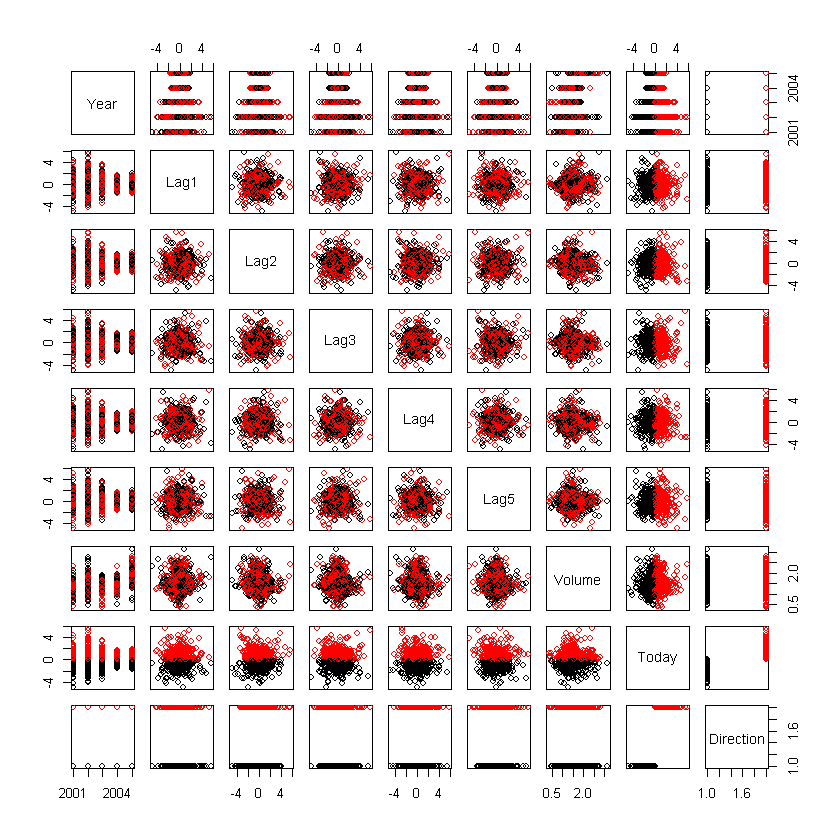

In [4]:
pairs(Smarket,col=Smarket$Direction)

In [5]:
# Hacer en ggplot2, te animas?

In [6]:
cor(Smarket) # This won't work, why?

ERROR: Error in cor(Smarket): 'x' must be numeric


In [ ]:
cor(Smarket[,-9]) # Note that Volume has some correlation with Year...

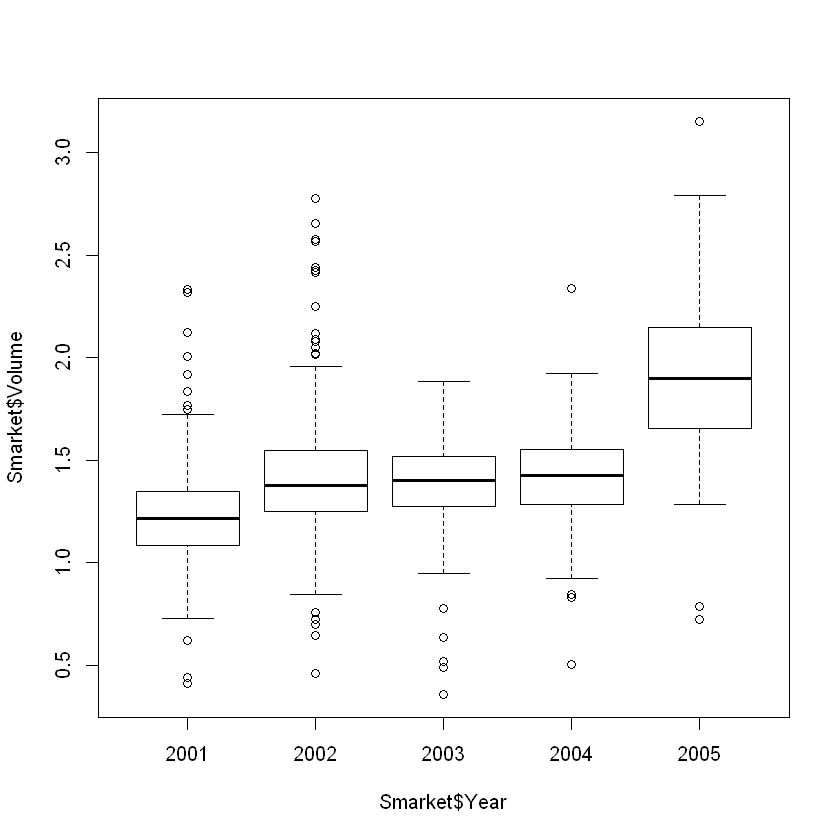

In [7]:
boxplot(Smarket$Volume~Smarket$Year)

In [ ]:
# Hacer en ggplot2, te animas?

In [ ]:
# Direction is derive from Today
cor(as.numeric(Smarket$Direction),Smarket$Today)

### Logistic regression - quick view

In [ ]:
glm.fit <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial)
summary(glm.fit)

In [ ]:
glm.probs <- predict(glm.fit,type="response") 
glm.probs

In [ ]:
glm.pred <- ifelse(glm.probs>0.5,"Up","Down")
glm.pred

In [ ]:
table(glm.pred,Smarket$Direction)
mean(glm.pred==Smarket$Direction)

### Logistic regression - correct version

In [ ]:
# Make training and test set
train <- (Smarket$Year < 2005)
glm.fit <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial, subset=train)
glm.fit

In [ ]:
glm.probs <- predict(glm.fit,newdata=Smarket[!train,], type="response") 
glm.pred <- ifelse(glm.probs >0.5,"Up","Down")
Direction.2005 <- Smarket$Direction[!train]
table(glm.pred,Direction.2005) # Overfitting!
mean(glm.pred==Direction.2005)

### Logistic regression - smaller model

In [ ]:
glm.fit <- glm(Direction~Lag1+Lag2, data=Smarket,family=binomial, subset=train)
glm.fit

In [ ]:
glm.probs <- predict(glm.fit,newdata=Smarket[!train,],type="response") 
glm.pred <- ifelse(glm.probs > 0.5,"Up","Down")
table(glm.pred,Direction.2005)
mean(glm.pred==Direction.2005)

### Logistic regression - Using caret...

In [ ]:
require(caret)
glmFit <- train(Smarket[train,-9], y = Smarket[train,9], method = "glm", preProcess = c("center", "scale"),
                tuneLength = 10, control=glm.control(maxit=500), trControl = trainControl(method = "cv"))
glmFit

In [ ]:
require(caret)
glmFit <- train(Smarket[train,-8:-9], y = Smarket[train,9], method = "glm", preProcess = c("center", "scale"),
                tuneLength = 10, control=glm.control(maxit=500), trControl = trainControl(method = "cv"))
glmFit

## Exercise
Using the Smarket dataset (all data, not only training) perform 10 fold-cv with logistic regression.

In [9]:
require(caret)
glmFit <- train(Smarket[,-8:-9], y = Smarket[,9], method = "glm", preProcess = c("center", "scale"),
                tuneLength = 10, control=glm.control(maxit=500), trControl = trainControl(method = "cv"))
glmFit

Warning message in load(system.file("models", "models.RData", package = "caret")):
"strings not representable in native encoding will be translated to UTF-8"

Generalized Linear Model 

1250 samples
   7 predictor
   2 classes: 'Down', 'Up' 

Pre-processing: centered (7), scaled (7) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1125, 1125, 1124, 1126, 1125, 1125, ... 
Resampling results:

  Accuracy   Kappa     
  0.5295815  0.04683326
